Affine transformation via matrix multiplication

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch

In [2]:
v = np.array([3,1])
v

array([3, 1])

In [3]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

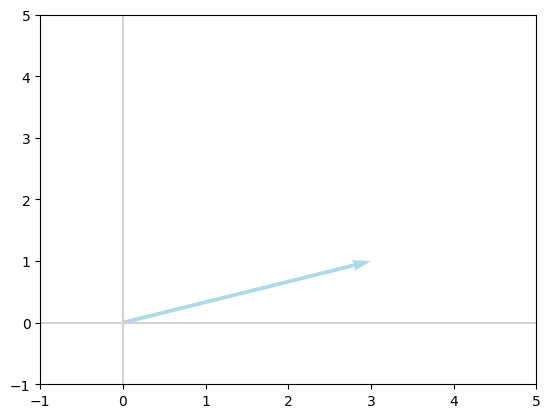

In [4]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)


In [5]:
# "Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.
# The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [6]:
v
Iv = np.dot(I, v)
v == Iv
Iv

array([3, 1])

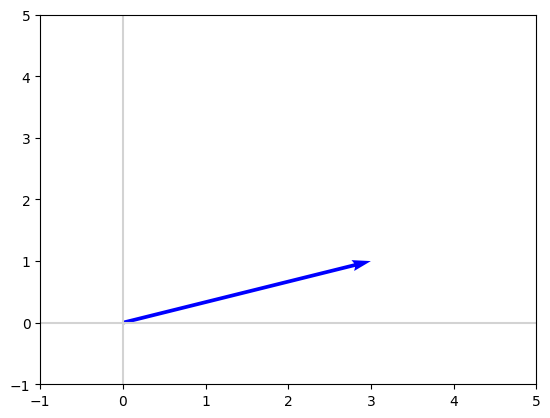

In [7]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)


In [8]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [9]:
Ev = np.dot(E,v)

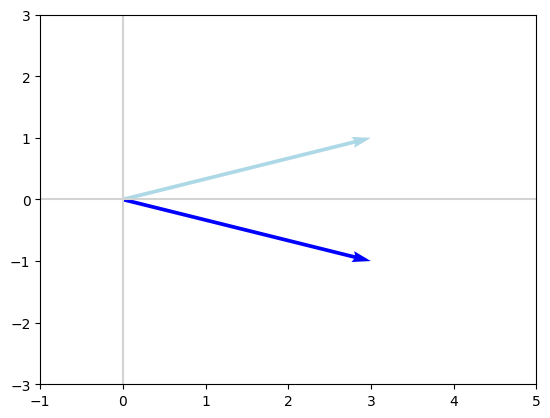

In [10]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

In [11]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [12]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

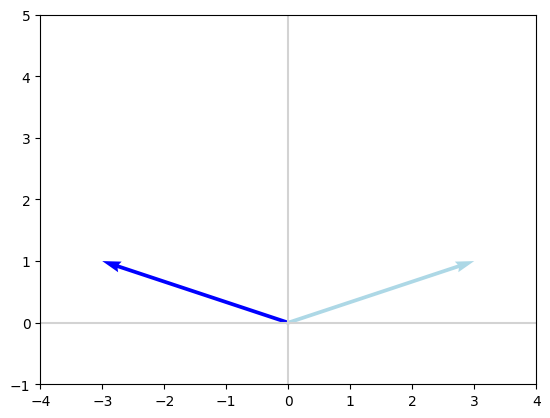

In [13]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

In [14]:
# Applying a flipping matrix is an example of an affine transformation: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In [15]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [16]:
Av = np.dot(A, v)
Av

array([1, 4])

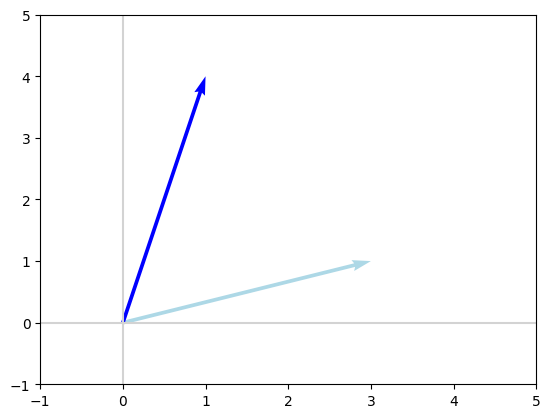

In [17]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

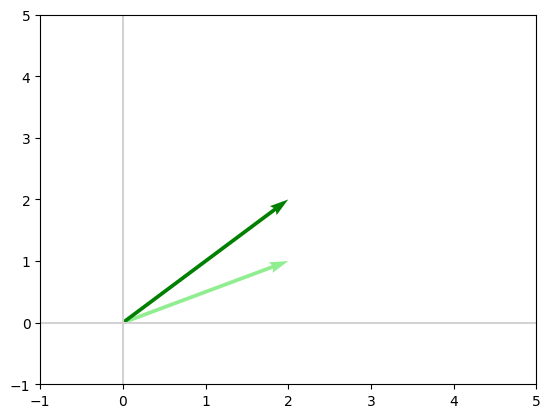

In [18]:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [19]:
v


array([3, 1])

In [20]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [21]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])
v4

array([-1,  1])

In [22]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [23]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [24]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [25]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)


In [26]:
vectorfy(V, 0)

array([3, 1])

In [27]:
vectorfy(V, 0) == v

array([ True,  True])

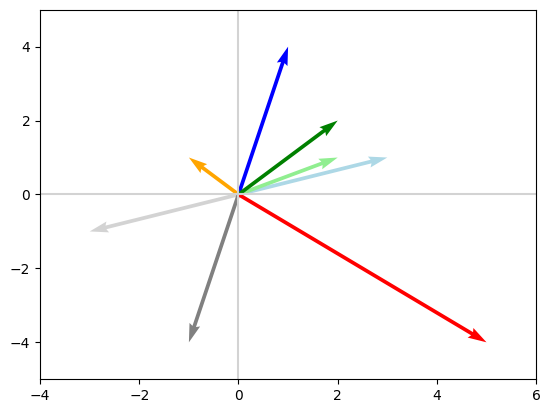

In [28]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

## EigenVector and EigenValue
An eigenvector (eigen is German for "typical"; we could translate eigenvector to "characteristic vector") <br>
is a special vector ʋ such that when it is transformed by some matrix (let's say A), the product Aʋ has the exact same direction as ʋ.<br>

An eigenvalue is a scalar (traditionally represented as ⋋) that simply scales the eigenvector such that the following equation is satisfied:<br>
Aʋ = ⋋ʋ



In [29]:
A

array([[-1,  4],
       [ 2, -2]])

In [30]:
lambdas, V = np.linalg.eig(A)
lambdas
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [31]:
v = V[:,0] 
v

array([0.86011126, 0.51010647])

In [32]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [33]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [34]:
lambduh * v

array([1.18031462, 0.70000958])

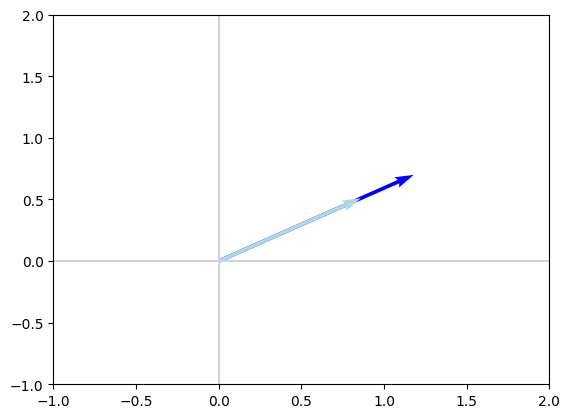

In [35]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [36]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [37]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [38]:
Av2 = np.dot(A, v2)
Av2


array([ 3.34281692, -2.81822977])

In [39]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

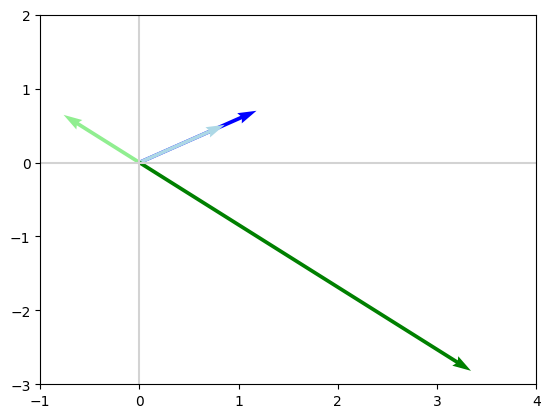

In [40]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

in pytorch

In [41]:
A

array([[-1,  4],
       [ 2, -2]])

In [42]:
A_p  = torch.tensor([[-1,4],[2,-2.]])
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [43]:
eigens = torch.linalg.eig(A_p) 
eigens

torch.return_types.linalg_eig(
eigenvalues=tensor([ 1.3723+0.j, -4.3723+0.j]),
eigenvectors=tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]]))

In [44]:
v_p = eigens.eigenvectors[:,0]
v_p

tensor([0.8601+0.j, 0.5101+0.j])

In [45]:
lambda_p = eigens.eigenvalues[0]
lambda_p

tensor(1.3723+0.j)

In [46]:
lambda_p.float() * v_p.float()

C:\Users\HP\AppData\Local\Temp\ipykernel_7356\3547469295.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ..\aten\src\ATen\native\Copy.cpp:299.)
  lambda_p.float() * v_p.float()


tensor([1.1803, 0.7000])

In [47]:
Av_p = torch.matmul(A_p, v_p.float())
Av_p

tensor([1.1803, 0.7000])

In [48]:
lambda_q = eigens.eigenvalues[1]
lambda_q

tensor(-4.3723+0.j)

In [49]:
v_q = eigens.eigenvectors[:,1]
v_q.float()


tensor([-0.7645,  0.6446])

In [50]:
Av_q = torch.matmul(A_p.float(), v_q.float())
Av_q

tensor([ 3.3428, -2.8182])

In [51]:
lambda_q * v_q

tensor([ 3.3428-0.j, -2.8182+0.j])

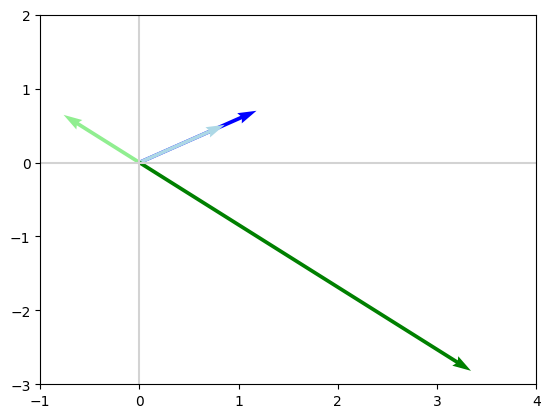

In [52]:
plot_vectors([Av_p.float().numpy(), v_p.float().numpy(), Av_q.float().numpy(), v_q.float().numpy()], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Eigenvectors in > 2 Dimensions

In [53]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [54]:
lambdas_X, V_X = np.linalg.eig(X) 
V_X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [55]:
lambdas_X,

(array([29.67623202, 20.62117365, -0.29740567]),)

In [56]:
lambda_X = lambdas_X[0] 
lambda_X

29.676232023948902

In [57]:
v_X = V_X[:,0] 
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [58]:
np.dot(X, v_X)

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [59]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

#### Exercise - verfiy eigen for remainig vectors and values in pytorch

In [60]:
# M_p = torch.from_numpy(X)
# M_p
M_p = torch.tensor([[25, 2, 9], [5, 26, -5], [3, 7, -1.]])

In [61]:
eigens_M = torch.linalg.eig(M_p) # needs float
eigens_M

torch.return_types.linalg_eig(
eigenvalues=tensor([29.6762+0.j, 20.6212+0.j, -0.2974+0.j]),
eigenvectors=tensor([[ 0.7118+0.j,  0.6502+0.j, -0.3422+0.j],
        [ 0.6665+0.j, -0.7446+0.j,  0.2379+0.j],
        [ 0.2217+0.j, -0.1509+0.j,  0.9090+0.j]]))

q1

In [62]:
M_evl1 = eigens_M.eigenvalues[1]
M_evl1 # eigenvalue 1

tensor(20.6212+0.j)

In [63]:
M_evc1 = eigens_M.eigenvectors[0:,1]
M_evc1 # eigenvector1

tensor([ 0.6502+0.j, -0.7446+0.j, -0.1509+0.j])

In [64]:
torch.matmul(M_p,M_evc1.float())

tensor([ 13.4077, -15.3554,  -3.1110])

In [65]:
# torch.dot(M_evl1, M_evc1)
M_evl1.float() * M_evc1.float()


tensor([ 13.4077, -15.3554,  -3.1110])

q2

In [66]:
M_evl2 = eigens_M.eigenvalues[2]
M_evl2 # eigenvalue 2

tensor(-0.2974+0.j)

In [67]:
M_evc2 = eigens_M.eigenvectors[0:,2]
M_evc2 # eigenvector2

tensor([-0.3422+0.j,  0.2379+0.j,  0.9090+0.j])

In [68]:
torch.matmul(M_p,M_evc2.float())

tensor([ 0.1018, -0.0708, -0.2703])

In [69]:
M_evl2.float() * M_evc2.float()

tensor([ 0.1018, -0.0708, -0.2703])

### Matrix Determinants
- Map square matrix to scalar
- Enable us to determine wheather martix can be inverted
- For Matrix X , denoted as det(X)
- if det(X) = 0
    - Matrix(X)<sup>-1</sup>cant be computed because : X<sup>-1</sup> has 1/det(X) = 1/0
    - Matrix is singular : it contains linearly dependent columns

In [70]:
X = np.array([[4,2],[-5,-3]])
X = np.array([[-4,1],[-8,2]])
np.linalg.det(X)

0.0

Determinants of large matrices

In [71]:
LM = torch.tensor([[1,2,3,4],[9,10,11,12],[13,14,14,16],[5,24,55,16.]])
LM

tensor([[ 1.,  2.,  3.,  4.],
        [ 9., 10., 11., 12.],
        [13., 14., 14., 16.],
        [ 5., 24., 55., 16.]])

In [72]:
LM.T # transposing
torch.linalg.det(LM)

tensor(-368.)

Determinants exercise

In [73]:
def chk_inv(d):
    d = np.linalg.det(d)
    print(d)
    if (d == 0):        #matrix has inverse only if determinant is non-zero
        print("No inverse!")
    print("Has an inverse")

In [74]:
x1 = np.array([[25,2],[3,4]])
np.linalg.det(x1) 
chk_inv(x1)

94.0
Has an inverse


In [75]:
X2 = np.array([[-2,0],[0,-2]])
chk_inv(X2)

4.0
Has an inverse


In [76]:
X3 = np.array([[2,1,-3],[4,-5,2],[0,-1,3]])
chk_inv(X3)

-26.000000000000014
Has an inverse


### Determinants and eigenvalues
det(X) = product of all eigenvalues of X


In [77]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [78]:
np.linalg.det(X)

19.999999999999996

In [79]:
#eigen
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [80]:
np.product(lambdas)

19.99999999999999

|det(X)| (absolute of x), quantifies volume change as a result of applying X
- if det(X) = 0, then X collapses space completley in at least one dimension, therby eliminating all volume
- if 0 < |det(X)| < 1, then X contracts volume to some extent,
- if |det(X)| = 1, then X preserves volume exactly,
- if |det(X)| > 1, then X exapnds volume,

In [81]:
np.abs(np.linalg.det(X))

19.999999999999996

In [82]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

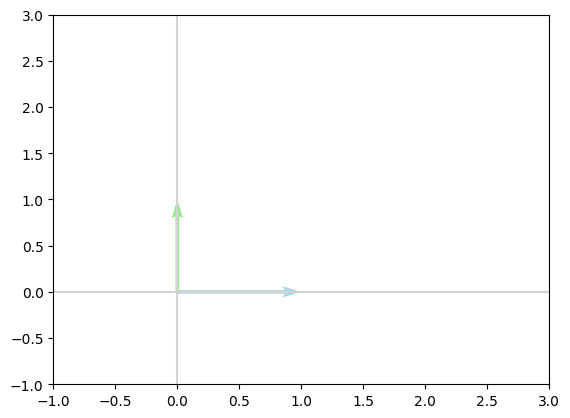

In [83]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [84]:
N = torch.tensor([[-4,1],[-8,2.]])
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [85]:
np.linalg.det(N)

0.0

In [86]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

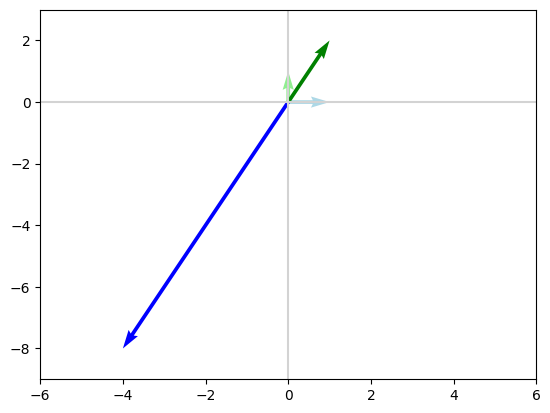

In [87]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero

In [88]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

In [89]:
I
np.linalg.det(I)

1.0

In [90]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

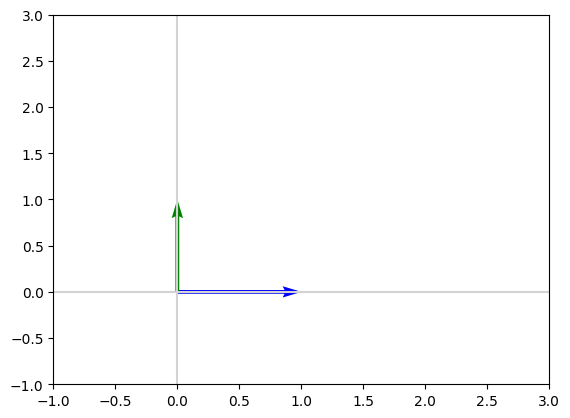

In [91]:

plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [92]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix J which is more interesting:

In [93]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [94]:
np.linalg.det(J)

-1.0

In [95]:
np.abs(np.linalg.det(J))

1.0

In [96]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

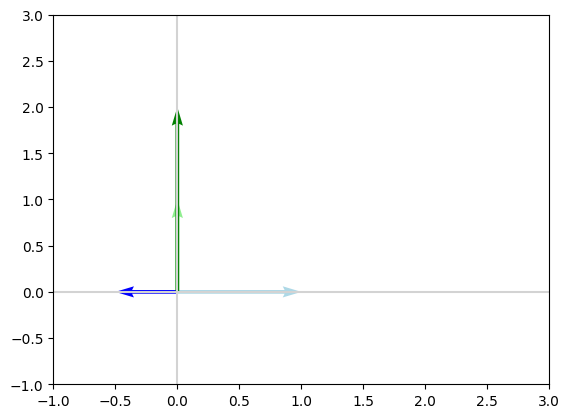

In [97]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [98]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

In [99]:
D = I*2
D


array([[2, 0],
       [0, 2]])

In [100]:
np.linalg.det(D)

4.0

In [101]:
DB = np.dot(D, B)
DB


array([[2, 0],
       [0, 2]])

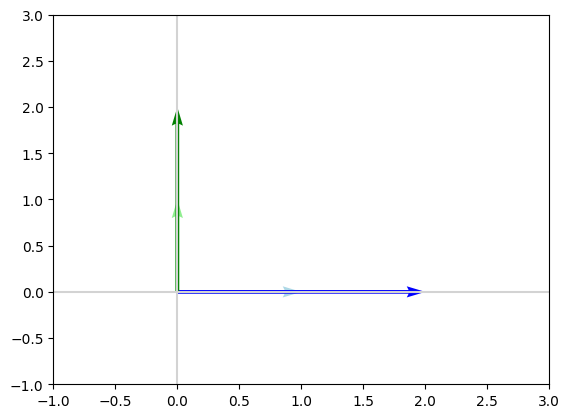

In [102]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

### Eigendecompostion
The decomposition of a matrix into eigenvectors and eigenvalues reveals characterstics of the matrix, <br>
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>A</mi>
  <mo>=</mo>
  <mi>V</mi>
  <mi mathvariant="normal">&#x39B;</mi>
  <msup>
    <mi>V</mi>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msup>
</math>
<br>
Where:
- As in examples above, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>V</mi>
</math> is the concatenation of all the eigenvectors of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>A</mi></math> 
- <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi mathvariant="normal">&#x39B;</mi></math>( upper-case<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>&#x3BB;</mi></math>) is the diagonal matrix diag(<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3BB;</mi></math>). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix <math xmlns="http://www.w3.org/1998/Math/MathML"><mi>A</mi></math>.


In [103]:
# This was used earlier as a matrix X; it has nice clean integer eigenvalues...
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [104]:
lambdas, V = np.linalg.eig(A)
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [105]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [106]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

In [107]:
# confirming eigen decomposition
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecompositon exercises

q1

In [1]:
P = torch.tensor([[25,2,-5], [3,-2,1], [5,7,4.]])
P

NameError: name 'torch' is not defined

In [123]:
eigens = torch.linalg.eig(P)
eigens.eigenvectors # V
eigens.eigenvalues 

tensor([23.7644+0.j,  6.6684+0.j, -3.4328+0.j])

In [122]:
# to prove eigendecompositon P = VAV-1
eigens_inv = torch.linalg.inv(eigens.eigenvectors) #V-1
eigens_inv

tensor([[ 1.1356+0.j,  0.0102+0.j, -0.2868+0.j],
        [ 0.3914+0.j, -0.7198-0.j, -1.0032-0.j],
        [ 0.0817+0.j, -1.1164-0.j,  0.2052+0.j]])

In [129]:
val_diag = torch.diag(eigens.eigenvalues)
val_diag

tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])

In [137]:
torch.matmul(eigens.eigenvectors, torch.matmul( val_diag, eigens_inv)).float()

tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

q2
prove S = QAQ<sup>T</sup>

In [139]:
S = torch.tensor([[25,2,-5],[2,-2,1],[-5,1,4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [140]:
eigens_s = torch.linalg.eig(S)
eigens_s

torch.return_types.linalg_eig(
eigenvalues=tensor([26.2361+0.j,  3.2435+0.j, -2.4796+0.j]),
eigenvectors=tensor([[ 0.9744+0.j,  0.1943+0.j, -0.1132+0.j],
        [ 0.0614+0.j,  0.2548+0.j,  0.9651+0.j],
        [-0.2163+0.j,  0.9473+0.j, -0.2363+0.j]]))

In [155]:
S_vc = eigens_s.eigenvectors
S_vl = eigens_s.eigenvalues
S_vl
S_vc

tensor([[26.2361+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  3.2435+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -2.4796+0.j]])

In [158]:
torch.matmul(S_vc, torch.matmul(torch.diag(S_vl), torch.t(S_vc))).float()

tensor([[25.0000,  2.0000, -5.0000],
        [ 2.0000, -2.0000,  1.0000],
        [-5.0000,  1.0000,  4.0000]])